# Regression with Text Based Entropy Measures

In [3]:
pwd

C:\Users\Herbie Huang\Google Drive\Current_SolarResearch\working_2020


## Import text ent data 

In [4]:
import delimited BERTtext_ent_90_100_2steps.csv

(25 vars, 10,368 obs)


In [5]:
su


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          v1 |     10,368      5183.5    2993.128          0      10367
      market |     10,368    17.80469    13.55121         -1         36
year_month~t |     10,368    45.79948    14.39884          1         64
installer_id |     10,368    18044.93    6707.335        108      23027
text_d_mk~an |      9,057    .1375434    .0235513   .0545641   .3658786
-------------+---------------------------------------------------------
text_d_mkt~d |      8,679    .0617684    .0166544   .0055242   .1519678
text_d_mk~in |      9,057     .035209    .0365696  -1.19e-07   .3658786
text_d_mk~25 |      9,057    .0966523    .0236698   .0545641   .3658786
text_d_mk~50 |      9,057    .1248378    .0254379   .0545641   .3658786
text_d_mk~75 |      9,057    .1652722    .0316213   .0545641   .3694176
-------------+-------------------------------------------------

In [6]:
drop v1

In [7]:
save BERTtext_ent_90_100_2twosteps.dta 

file BERTtext_ent_90_100_2twosteps.dta saved


## Import Text level ent variables 

In [5]:
use BERTtext_ent_90_100_2twosteps.dta ,clear

In [6]:
su


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      market |     10,368    17.80469    13.55121         -1         36
year_month~t |     10,368    45.79948    14.39884          1         64
installer_id |     10,368    18044.93    6707.335        108      23027
text_d_mk~an |      9,057    .1375434    .0235513   .0545641   .3658786
text_d_mk~in |      9,057     .035209    .0365696  -1.19e-07   .3658786
-------------+---------------------------------------------------------
text_d_mk~25 |      9,057    .0966523    .0236698   .0545641   .3658786
text_d_mk~50 |      9,057    .1248378    .0254379   .0545641   .3658786
text_d_mk~75 |      9,057    .1652722    .0316213   .0545641   .3694176
text_d_mkt~x |      9,057      .41044    .1597509   .0545641   .7564847
text_d_se~an |      5,313    .1361488    .0493448          0   .3812145
-------------+-------------------------------------------------

## Just re run and produce the regression results

In [8]:
use final_step_analysis_ind_jan17.dta ,clear

In [9]:
merge 1:1 installer_id year_month_count market using BERTtext_ent_90_100_2twosteps.dta 


    Result                           # of obs.
    -----------------------------------------
    not matched                         2,255
        from master                         0  (_merge==1)
        from using                      2,255  (_merge==2)

    matched                             8,113  (_merge==3)
    -----------------------------------------


In [10]:
corr ent_others text_d_others_p50 if ent_others!=0

(obs=3,834)

             | ent_ot~s te~s_p50
-------------+------------------
  ent_others |   1.0000
text_d_ot~50 |   0.4080   1.0000



In [13]:
su avg_sent*,d


                     Avg Sentiment Score
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0         -.8268
 5%       .43275         -.6808
10%        .5496         -.6808       Obs               4,953
25%      .634175         -.6808       Sum of Wgt.       4,953

50%         .704                      Mean           .6833483
                        Largest       Std. Dev.      .1630279
75%        .7772          .9576
90%     .8325796          .9576       Variance       .0265781
95%       .86145          .9576       Skewness      -3.394706
99%        .9062          .9576       Kurtosis       23.33489

                        Avg Sent(MKT)
-------------------------------------------------------------
      Percentiles      Smallest
 1%     .3178286         .05934
 5%        .5719         .05934
10%      .622235         .05934       Obs               6,984
25%      .663772       .1412889       Sum of Wgt.       6,984

50%     .69

In [15]:
label variable ent_others "Entropy Others"
label variable text_d_others_p50 "Text-based Entropy Others"

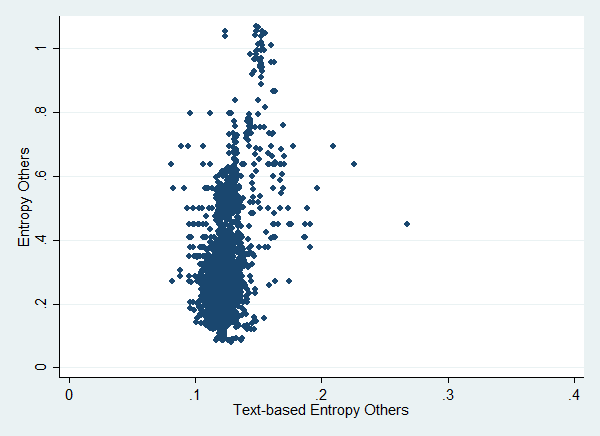

In [16]:
scatter ent_others text_d_others_p50 if ent_others!=0

In [17]:
tab _merge



                 _merge |      Freq.     Percent        Cum.
------------------------+-----------------------------------
         using only (2) |      2,255       21.75       21.75
            matched (3) |      8,113       78.25      100.00
------------------------+-----------------------------------
                  Total |     10,368      100.00


In [18]:
keep if _merge==3 
drop _merge 


(2,255 observations deleted)



In [19]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      4,953    .6833483    .1630279     -.8268      .9576
avg_sent_s~t |      6,984    .6936544    .0778375     .05934    .886075
avg_sent_s~s |      6,634    .6925234    .0888809     -.5994      .9576


In [20]:
su avg*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         avg |      4,953    4.880346    .3971615          1          5
avg_sent_s~e |      4,953    .6833483    .1630279     -.8268      .9576
 avgmean_mkt |      6,984    4.891938    .1832806          3          5
avgmean_ot~s |      6,634    4.891381    .1984802          1          5
avg_sent_s~t |      6,984    .6936544    .0778375     .05934    .886075
-------------+---------------------------------------------------------
avg_sent_s~s |      6,634    .6925234    .0888809     -.5994      .9576
      avg_v2 |      8,113     2.97946    2.400126          0          5


In [21]:
su ent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ent_mkt |      5,340    .2376226    .1857222          0    1.05492
  ent_others |      5,340    .2247373    .1915538          0   1.070593
    ent_self |      5,340    .0981426    .2199734          0   1.209574


In [22]:
save regression_analysis_ind_with_ent_sent_jan18.dta

file regression_analysis_ind_with_ent_sent_jan18.dta saved


### patch:  generate indicator variables for missing avg_sent*

In [1]:
use regression_analysis_ind_with_ent_sent_jan18.dta 

In [2]:
su avg_sen*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      4,953    .6833483    .1630279     -.8268      .9576
avg_sent_s~t |      6,984    .6936544    .0778375     .05934    .886075
avg_sent_s~s |      6,634    .6925234    .0888809     -.5994      .9576


In [3]:
replace avg_sent_score=0 if avg_sent_score==.
gen missing_avg_sent=0
replace missing_avg_sent=1 if avg_sent_score==0 

replace avg_sent_score_others=0 if avg_sent_score_others==.
gen missing_avg_sent_others=0
replace missing_avg_sent_others=1 if avg_sent_score_others==0 

replace avg_sent_score_mkt=0 if avg_sent_score_mkt==.
gen missing_avg_sent_mkt=0
replace missing_avg_sent_mkt=1 if avg_sent_score_mkt==0 



(3,160 real changes made)


(3,196 real changes made)

(1,479 real changes made)


(1,507 real changes made)

(1,129 real changes made)


(1,129 real changes made)


In [4]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576
avg_sent_s~t |      8,113    .5971259    .2507234          0    .886075
avg_sent_s~s |      8,113    .5662764    .2792114     -.5994      .9576


## patch: label variables 

In [7]:
label variable text_d_self_p50 "Text-based Entropy(self)"

In [9]:
save regression_analysis_ind_with_ent_sent_jan18.dta, replace

file regression_analysis_ind_with_ent_sent_jan18.dta saved
